# Упрощаем использование TL. Фреймворк Huggingface

## Первый семинар

![image.png](attachment:image.png)

## Второй семинар

![fdbd6488-6edc-4a18-8070-7f587f38bc92.jfif](attachment:fdbd6488-6edc-4a18-8070-7f587f38bc92.jfif)

Вы уже получили представление, с чего начинается проект с нейросетями или откуда брать эмбеддинги.

- Например, вы можете взять Colab и создать поисковик по изображениям: https://blog.roboflow.com/clip-image-search-faiss/.
- Или можете создать рекомендательныю систему по текстовым описаниям товаров: https://www.kaggle.com/code/andrzejpackard/bert-and-faiss-for-recomendation-engine

Следующий шаг – упростить себе работу с широчайшим перечнем предобученных моделей.

Нам понадобится библиотека transformers.

In [1]:
# Устанавливаем библиотеку, если она не установлена
!pip install transformers

## Почему трансформеры?

- Не простые эмбеддинги, а позиционные (часть слова + положение в последовательности)
- 10-20 одинаковых модулей, которые постоянно рассылают друг другу "запросы"
- Каждый модуль практически равен строчке кода в программе (хотя может делать гораздо более сложные вещи)
- Очень эффективно вычисляется и распараллеливается

В предшествующих (реккурентных) сетях обучение и вычисление велось по цепочке. Тут все параллельно.

* GPT3 учитывал 8000.
* GPT4 учитывает 32000 токенов в качестве контекста (объем маленькой книги).
* Flash attention – 64000 (среднего размера книга)

![image.png](attachment:image.png)

https://www.youtube.com/watch?v=NzLwHcqE6Jw

Зато... трансформеры требуют огромного количества памяти.

* _Stable Diffusion_ – модели от 10 Гб и больше
* _GPT_... давайте посмотрим на сайте

# Что такое Huggingface

* Сотни тысяч предобученных моделей
* Очень много датасетов (как и в kaggle, и в Google Dataset Search)
* HF Spaces

Пройдемся по https://huggingface.co/

Когда нужно хранить модель локально, а когда лучше пользоваться API?

## Примеры кода (pipeline)

Объекты Pipeline: https://huggingface.co/docs/transformers/v4.35.2/en/main_classes/pipelines

Демо чат-бота:

- https://huggingface.co/tasks/conversational
- https://huggingface.co/docs/transformers/v4.35.2/en/main_classes/pipelines#transformers.ConversationalPipeline

```python
from transformers import pipeline, Conversation

chatbot = pipeline(model="microsoft/DialoGPT-medium")
conversation = Conversation("Going to the movies tonight - any suggestions?")
conversation = chatbot(conversation)
conversation.generated_responses[-1]
>>> 'The Big Lebowski'

conversation.add_user_input("Is it an action movie?")
conversation = chatbot(conversation)
conversation.generated_responses[-1]
>>> "It's a comedy."
```

Онлайн-демо: https://huggingface.co/spaces/shawhin/vanilla-chatbot

# Задачи компьютерного зрения

* Оценка карты глубины по фотографии: https://huggingface.co/blog/cv_state#support-for-pipelines
* Классификация изображений
* Сегментация изображений
* Перевод изображения в изображение
* Детекция объектов
* Классификация видео
* Классификация без заранее определенных меток (ZeroShot Classification)

Перечень задач: https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#computer-vision

No model was supplied, defaulted to Intel/dpt-large and revision e93beec (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  w

config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

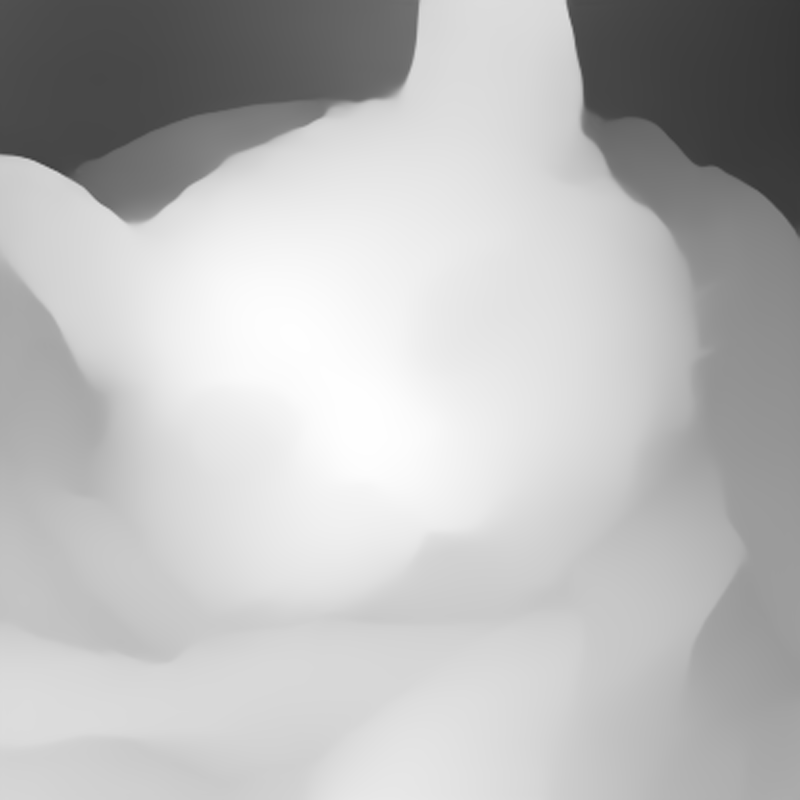

In [2]:
from transformers import pipeline

depth_estimator = pipeline(task="depth-estimation") # model="Intel/dpt-large")
output = depth_estimator("https://wiki.mininuniver.ru/images/f/fc/%D0%9A%D0%BE%D1%82%D0%B8%D0%BA.jpg")
# Вызов этой команды возвращает нам тензор, в котором дана оценочная информация
# об удаленности каждого объекта от зрителя (в метрах)
output["depth"]

Генерация изображений там тоже есть, но, как было сказано, диффузионные модели занимают огромное пространство в памяти.

In [3]:
#!pip install diffusers

#from diffusers import DiffusionPipeline
#generator = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
#generator.to("cuda")
#image = generator("An image of a squirrel in Picasso style").images[0]

# Поработаем с текстом

Модели, понимающий русский язык: https://huggingface.co/models?language=ru

Например, поищем русские модели для перевода текста в речь: https://huggingface.co/docs/transformers/tasks/text-to-speech

In [4]:
from transformers import pipeline

question_answerer = pipeline(
    "question-answering",
    model="Den4ikAI/rubert-large-squad",
    tokenizer="Den4ikAI/rubert-large-squad"
)

config.json:   0%|          | 0.00/712 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/713M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [5]:
context = """
Во́льфганг Амаде́й Мо́царт (нем. Wolfgang Amadeus Mozart, МФА МФА: [ˈvɔlfɡaŋ amaˈdeus ˈmoːtsaʁt](инф.); полное имя — Иога́нн Хризосто́м Во́льфганг Амаде́й Мо́царт; 27 января 1756, Зальцбург — 5 декабря 1791, Вена) — австрийский композитор и музыкант-виртуоз. Один из самых популярных классических композиторов, Моцарт оказал большое влияние на мировую музыкальную культуру.
По свидетельству современников, Моцарт обладал феноменальным музыкальным слухом, памятью и способностью к импровизации. Самый молодой член[К 1] Болонской филармонической академии (с 1770 года) за всю её историю, а также самый молодой кавалер ордена Золотой шпоры (1770)."""

In [6]:
result = question_answerer(question="Моцарт был кавалером какого ордена?", context=context)
print( result['answer'] )

Золотой шпоры


In [7]:
result

{'score': 0.5918421745300293,
 'start': 624,
 'end': 637,
 'answer': 'Золотой шпоры'}

In [8]:
result = question_answerer(question="Кем был Моцарт?", context=context)
print( result['answer'] )

австрийский композитор и музыкант-виртуоз


# Домашнее задание

Реализуйте классификацию эмоциональной окрашенности текстов при помощи объекта pipeline.

1. Найдите тип задач Sentiment Analysis на huggingface.co
2. Найдите модель для русского языка (примеры: rubert-tiny2..., rubert-base...)

In [9]:
import transformers
# Use a pipeline as a high-level helper
from transformers import pipeline
# Выберем модель НС на https://huggingface.co/
classifier = pipeline("text-classification", model="seara/rubert-tiny2-ru-go-emotions")

config.json:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/410 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [14]:
dict_label = {
'admiration': 'восхищение',
'amusement': 'веселье',
'anger': 'злость',
'annoyance': 'раздражение',
'approval': 'одобрение',
'caring': 'забота',
'confusion': 'непонимание',
'curiosity': 'любопытство',
'desire': 'желание',
'disappointment': 'разочарование',
'disapproval': 'неодобрение',
'disgust': 'отвращение',
'embarrassment': 'смущение',
'excitement': 'возбуждение',
'fear': 'страх',
'gratitude': 'признательность',
'grief': 'горе',
'joy': 'радость',
'love': 'любовь',
'nervousness': 'нервозность',
'optimism': 'оптимизм',
'pride': 'гордость',
'realization': 'осознание',
'relief': 'облегчение',
'remorse': 'раскаяние',
'sadness': 'грусть',
'surprise': 'удивление',
'neutral': 'нейтральность',
}

In [15]:
# Определение функции для присвоения метки настроения на основе текста отзыва
def get_sentiment_label(text, dict_label, classifier):
    '''
    Функция выводит русифицированную метку настроения.

    :param text: текст по которому будем определять тональность,
    :param dict_label: рускоязычное обозначение тональности,
    :param classifier: модель НС определения тональности текста,
    :return: возвращает русифицированную оценку тональности.
    '''
    value = classifier(text)[0]['label']
    value = dict_label[value]
    return value

Выполните следующую ячейку. Если вы правильно инициализировали `pipeline`, вы получите относительно верные предсказания.

In [16]:
text = ["Отличный товар",
            "Мне не понравилось",
            "Прекрасно выглядит, ничего не меняйте!",
            "Ничего не понял",
            "У меня не работала розетка, в остальном все отлично"]
classifier( text )

[{'label': 'admiration', 'score': 0.9183667302131653},
 {'label': 'disapproval', 'score': 0.3069019317626953},
 {'label': 'admiration', 'score': 0.9194331169128418},
 {'label': 'neutral', 'score': 0.5132651329040527},
 {'label': 'admiration', 'score': 0.7506750226020813}]

In [17]:
import pandas as pd

df = pd.DataFrame()
# Загружаем текст наших отзывов в датафрейм
df['text'] =  pd.DataFrame(text)
# Применение функции к столбцу 'text' датасета для присвоения меток настроения
df['sentiment_label'] = df['text'].apply(lambda x : get_sentiment_label(x, dict_label, classifier))

In [18]:
df

,text,sentiment_label
0,Отличный товар,восхищение
1,Мне не понравилось,неодобрение
2,"Прекрасно выглядит, ничего не меняйте!",восхищение
3,Ничего не понял,нейтральность
4,"У меня не работала розетка, в остальном все от...",восхищение


<Axes: >

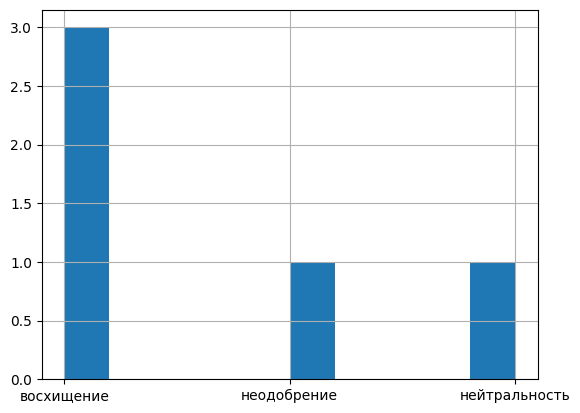

In [19]:
df['sentiment_label'].hist()

## Вывод:

### Нашел подходящую русскоязычную модель определения тональности текста на Hugging Face, потестил её там на примерах из ДЗ, далее загрузил НС на локальную машину с помощью пакета transformers.pipeline.

# Как запустить сервис на основе модели?

Например, в Gradio:

1. https://huggingface.co/spaces/gradio/chatbot
2. https://www.kdnuggets.com/2023/06/build-ai-chatbot-5-minutes-hugging-face-gradio.html

Или в Huggingface Spaces: https://huggingface.co/spaces

# И напоследок поработаем с кодом

In [20]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="huggingface/CodeBERTa-small-v1",
    tokenizer="huggingface/CodeBERTa-small-v1"
)

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/336M [00:00<?, ?B/s]

Some weights of the model checkpoint at huggingface/CodeBERTa-small-v1 were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/994k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/483k [00:00<?, ?B/s]

In [21]:
python_code = """
# a list of numbers
my_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]
my_numbers.<mask>


"""

In [22]:
fill_mask( python_code )

[{'score': 0.5379528999328613,
  'token': 1942,
  'token_str': 'sort',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.sort\n\n\n'},
 {'score': 0.08208338171243668,
  'token': 3059,
  'token_str': 'clear',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.clear\n\n\n'},
 {'score': 0.05829783156514168,
  'token': 5648,
  'token_str': 'reverse',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.reverse\n\n\n'},
 {'score': 0.027740854769945145,
  'token': 812,
  'token_str': 'append',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.append\n\n\n'},
 {'score': 0.0187204722315073,
  'token': 808,
  'token_str': 'length',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.length\n\n\n'}]

# Библиография

https://colab.research.google.com/github/huggingface/notebooks/blob/master/transformers_doc/task_summary.ipynb#scrollTo=QGwpVScF2kZO

https://huggingface.co/huggingface/CodeBERTa-small-v1

https://huggingface.co/spaces/codeparrot/code-generation-models